# This is to attempt regression on black friday dataset from kaggle

https://www.kaggle.com/mehdidag/black-friday/version/1#

import all the libraries required for processing

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import cross_val_score
from scipy.stats import skew

C:\Users\sagar\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Read the dataset into a dataframe using pandas

In [2]:
bf=pd.read_csv('C:\\Users\\sagar\\Downloads\\black-friday\\BlackFriday.csv')

checking the shape and describe the dataset

In [3]:
bf.shape

(537577, 12)

In [4]:
bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


From the above data we can understand that, Product_Category_2,Product_Category_3 have nulls in them. Need to handle them as well

In [5]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


looking at the sample data, age is a range column here, gender is alpha, product_id is alphanumeric, city_category is alphabet

We will go through various types of charts to get an idea on data
1. genders(pie chart)
2. age(histogram)
3. city_category(pie chart)
4. product_category_1(histogram)
5. product_category_2(histogram)
6. product_category_3(histogram)
7. Stay in city(histogram/pie based on data)

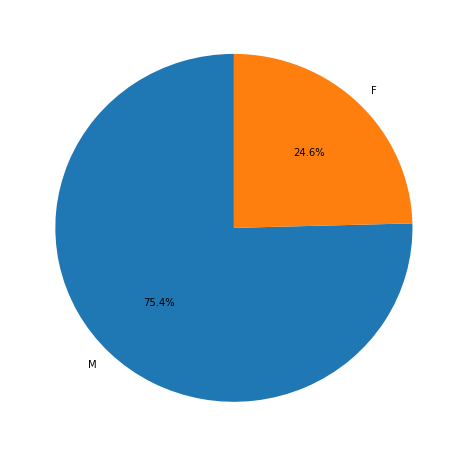

In [6]:
pi = plt.figure(figsize=(8,8))
df=pd.DataFrame(bf['Gender'].value_counts())
plt.pie(df['Gender'],autopct='%1.1f%%',labels=df.index,startangle=90)
plt.show()

From above result, the dataset has a bias on gender, meaning, Male is more than Female, this variable might affect output variable

we will replace age gap with following numbers to get through analysis as numbers

In [7]:
bf['Age'] = bf['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})


C:\Users\sagar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


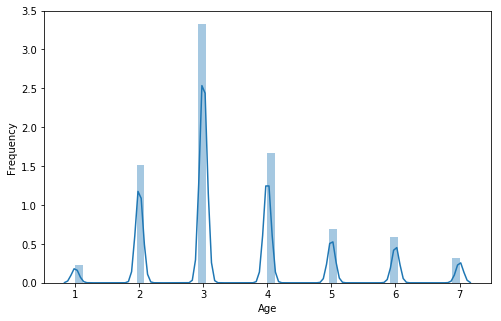

In [8]:
fig = plt.figure(figsize=(8,5))
ax=sns.distplot(bf['Age'])
ax.set_ylabel('Frequency')
plt.show()

From above graph, 36-45 have more number of records and 0-17 and 55+ are very less

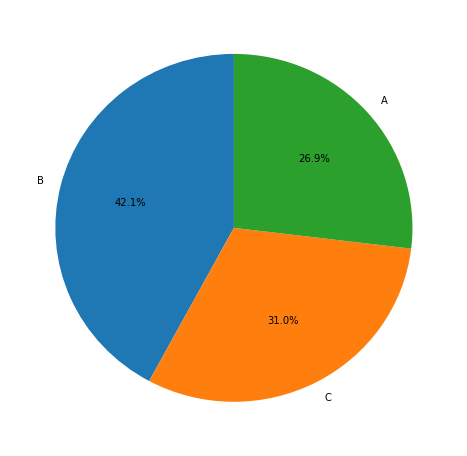

In [9]:
pi = plt.figure(figsize=(8,8))
df1=pd.DataFrame(bf['City_Category'].value_counts())
plt.pie(df1['City_Category'],autopct='%1.1f%%',labels=df1.index,startangle=90)
plt.show()

three cities are not almost equally distributed. so, might have a affect on output variable. We will see in the later steps

C:\Users\sagar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


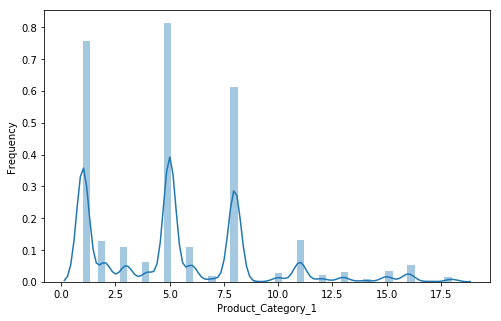

In [10]:

fig = plt.figure(figsize=(8,5))
ax=sns.distplot(bf['Product_Category_1'])
ax.set_ylabel('Frequency')
plt.show()

these products are not equally bought/there is a lot of variation in buying. so based on individual price, the target price will vary

In [11]:
bf['Product_Category_2'].value_counts().sort_values()

7.0       615
18.0     2730
3.0      2835
10.0     2991
12.0     5419
9.0      5591
13.0    10369
17.0    13130
11.0    13945
6.0     16251
4.0     25225
5.0     25874
15.0    37317
16.0    42602
2.0     48481
14.0    54158
8.0     63058
Name: Product_Category_2, dtype: int64

In [12]:
bf['Product_Category_3'].value_counts().sort_values()

3.0       600
10.0     1698
11.0     1773
4.0      1840
18.0     4563
6.0      4818
13.0     5385
12.0     9094
9.0     11414
8.0     12384
5.0     16380
17.0    16449
14.0    18121
15.0    27611
16.0    32148
Name: Product_Category_3, dtype: int64

one product might belong to different categories as well it seems

In [13]:
bf['Stay_In_Current_City_Years'].value_counts().sort_values()
bf['Stay_In_Current_City_Years'] = bf['Stay_In_Current_City_Years'].replace({'0': 1, '1': 2, '2': 3, '3': 4, '4+': 5})


C:\Users\sagar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


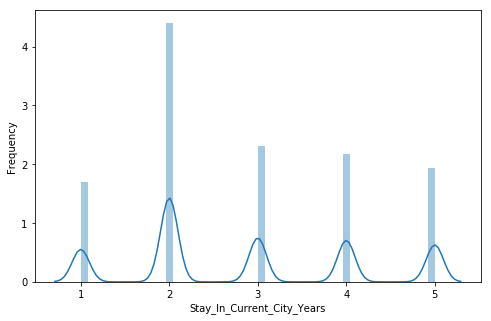

In [14]:
fig = plt.figure(figsize=(8,5))
ax=sns.distplot(bf['Stay_In_Current_City_Years'])
ax.set_ylabel('Frequency')
plt.show()

stay in current city has a different distribution. correlation with output variable is required to see further

Let's map those variables with clear numbers to see further

In [15]:
bf.head()
bf['Product_ID'].value_counts()

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
P00184942    1424
P00046742    1417
P00058042    1396
P00059442    1384
P00145042    1384
P00237542    1374
P00255842    1354
P00117942    1346
P00110942    1336
P00010742    1331
P00110842    1260
P00220442    1253
P00051442    1233
P00102642    1228
P00117442    1227
P00278642    1213
P00242742    1194
P00034742    1188
P00080342    1186
P00148642    1179
P00028842    1172
P00031042    1168
P00251242    1167
P00114942    1162
P00270942    1141
             ... 
P00072142       1
P00336242       1
P00027842       1
P00239442       1
P00144942       1
P00068342       1
P00357542       1
P00329042       1
P00013542       1
P00352042       1
P00299342       1
P00091542       1
P00238842       1
P00143242       1
P00305542       1
P00065942       1
P00081342       1
P00203942       1
P00070142       1
P00062342       1
P00072042       1
P00291642       1
P00075042       1
P00206542       1
P00335642 

lets do a pair plot of all the variables

In [16]:
bf.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [17]:
bf['Gender'] = bf['Gender'].replace({'M': 0, 'F': 1})
bf['City_Category'] = bf['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})

replacing the nan to 0 

In [18]:
bf['Product_Category_2'].fillna(0, inplace=True)
bf['Product_Category_3'].fillna(0, inplace=True)

In [19]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,1,10,1,3,0,3,0.0,0.0,8370
1,1000001,P00248942,1,1,10,1,3,0,1,6.0,14.0,15200
2,1000001,P00087842,1,1,10,1,3,0,12,0.0,0.0,1422
3,1000001,P00085442,1,1,10,1,3,0,12,14.0,0.0,1057
4,1000002,P00285442,0,7,16,3,5,0,8,0.0,0.0,7969


creating a function to check the dependency of each variable

In [20]:
def model(X,Y):
    model = sm.OLS(Y,sm.add_constant(X))
    results = model.fit()
    print(results.summary())
    X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=10,test_size=0.3)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    scores = cross_val_score(lr, X_test,y_test, cv=2)
    print(" ****Score********* "+ str(lr.score(X_test,y_test)))
    print(" ****Intercept***** "+str(lr.intercept_))
    print(" ****Coefficient*** "+str(lr.coef_))
    print(" ****Cross Validation Score********* "+ str(scores))
#    predictions =lr.predict(X_test)
#    pred_df =pd.DataFrame({'y_test':y_test,'Predictions':predictions})
#    return (pred_df)
    

selecting the columns X and Y

In [21]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,1,10,1,3,0,3,0.0,0.0,8370
1,1000001,P00248942,1,1,10,1,3,0,1,6.0,14.0,15200
2,1000001,P00087842,1,1,10,1,3,0,12,0.0,0.0,1422
3,1000001,P00085442,1,1,10,1,3,0,12,14.0,0.0,1057
4,1000002,P00285442,0,7,16,3,5,0,8,0.0,0.0,7969


In [22]:
X_col=['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3']
y_col=['Purchase']
DS=bf[['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1','Product_Category_2', 'Product_Category_3','Purchase']]

arranging the product_category columns to 18 different columns(18) is maximum product number.

In [262]:
DS['product_1']='0'
DS['product_2']='0'
DS['product_3']='0'
DS['product_4']='0'
DS['product_5']='0'
DS['product_6']='0'
DS['product_7']='0'
DS['product_8']='0'
DS['product_9']='0'
DS['product_10']='0'
DS['product_11']='0'
DS['product_12']='0'
DS['product_13']='0'
DS['product_14']='0'
DS['product_15']='0'
DS['product_16']='0'
DS['product_17']='0'
DS['product_18']='0'

DS['Product_Category_2'] = DS['Product_Category_2'].fillna(0).astype(int)
DS['Product_Category_3'] = DS['Product_Category_3'].fillna(0).astype(int)



In [268]:
def products(x):
    import time
    z=x
    y=DS[z].unique()
    for i in y :
        j='product_'+ str(i)
        if j in DS.columns:
            DS.loc[DS[z] == i, j] = 1
    print (time.clock() - start_time, "seconds")
    print(DS.head())

In [267]:
products('Product_Category_3')

545.7582375533418
0.33115055862913323 seconds
   Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
0       1    1          10              1                           3   
1       1    1          10              1                           3   
2       1    1          10              1                           3   
3       1    1          10              1                           3   
4       0    7          16              3                           5   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                   0                   0   
1               0                   1                   6                  14   
2               0                  12                   0                   0   
3               0                  12                  14                   0   
4               0                   8                   0                   0   

   Purchase    ...     produ

In [265]:
DS.head(20)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,...,product_9,product_10,product_11,product_12,product_13,product_14,product_15,product_16,product_17,product_18
0,1,1,10,1,3,0,3,0,0,8370,...,0,0,0,0,0,0,0,0,0,0
1,1,1,10,1,3,0,1,6,14,15200,...,0,0,0,0,0,0,0,0,0,0
2,1,1,10,1,3,0,12,0,0,1422,...,0,0,0,1,0,0,0,0,0,0
3,1,1,10,1,3,0,12,14,0,1057,...,0,0,0,1,0,0,0,0,0,0
4,0,7,16,3,5,0,8,0,0,7969,...,0,0,0,0,0,0,0,0,0,0
5,0,3,15,1,4,0,1,2,0,15227,...,0,0,0,0,0,0,0,0,0,0
6,0,5,7,2,3,1,1,8,17,19215,...,0,0,0,0,0,0,0,0,0,0
7,0,5,7,2,3,1,1,15,0,15854,...,0,0,0,0,0,0,0,0,0,0
8,0,5,7,2,3,1,1,16,0,15686,...,0,0,0,0,0,0,0,0,0,0
9,0,3,20,1,2,1,8,0,0,7871,...,0,0,0,0,0,0,0,0,0,0


In [269]:
DS.Occupation.value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64